In [12]:
# Install the statsmodels package
!pip install statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ----- ---------------------------------- 1.3/9.6 MB 6.7 MB/s eta 0:00:02
   ---------- ----------------------------- 2.6/9.6 MB 6.3 MB/s eta 0:00:02
   --------------- ------------------------ 3.7/9.6 MB 6.4 MB/s eta 0:00:01
   -------------------- ------------------- 5.0/9.6 MB 6.3 MB/s eta 0:00:01
   -------------------------- ------------- 6.3/9.6 MB 6.2 MB/s eta 0:00:01
   ------------------------------- -------- 7.6/9.6 MB 6.3 MB/s eta 0:00:01
   ------------------------------------- -- 8.9/9.6 MB 6.2 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 5.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
# Load the dataset
import pandas as pd

# Load the housing dataset
df = pd.read_csv('housing.csv')

# Display the first few rows of the dataset
df.head()
# Assuming 'df' is loaded from your full CSV (not the snippet)
# If you're using the snippet, replace pd.read_csv('housing.csv') with:
# df = pd.read_csv(io.StringIO(data_string_you_provided), sep=',') # where data_string_you_provided is your CSV text
# But since you said you have the full CSV, assume we're loading that.

print("--- df.head() ---")
print(df.head())

print("\n--- df.info() ---")
df.info()

print("\n--- df.describe() ---")
print(df.describe())

--- df.head() ---
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

--- df.info() ---
<class 'pandas.core.frame.DataFrame'>


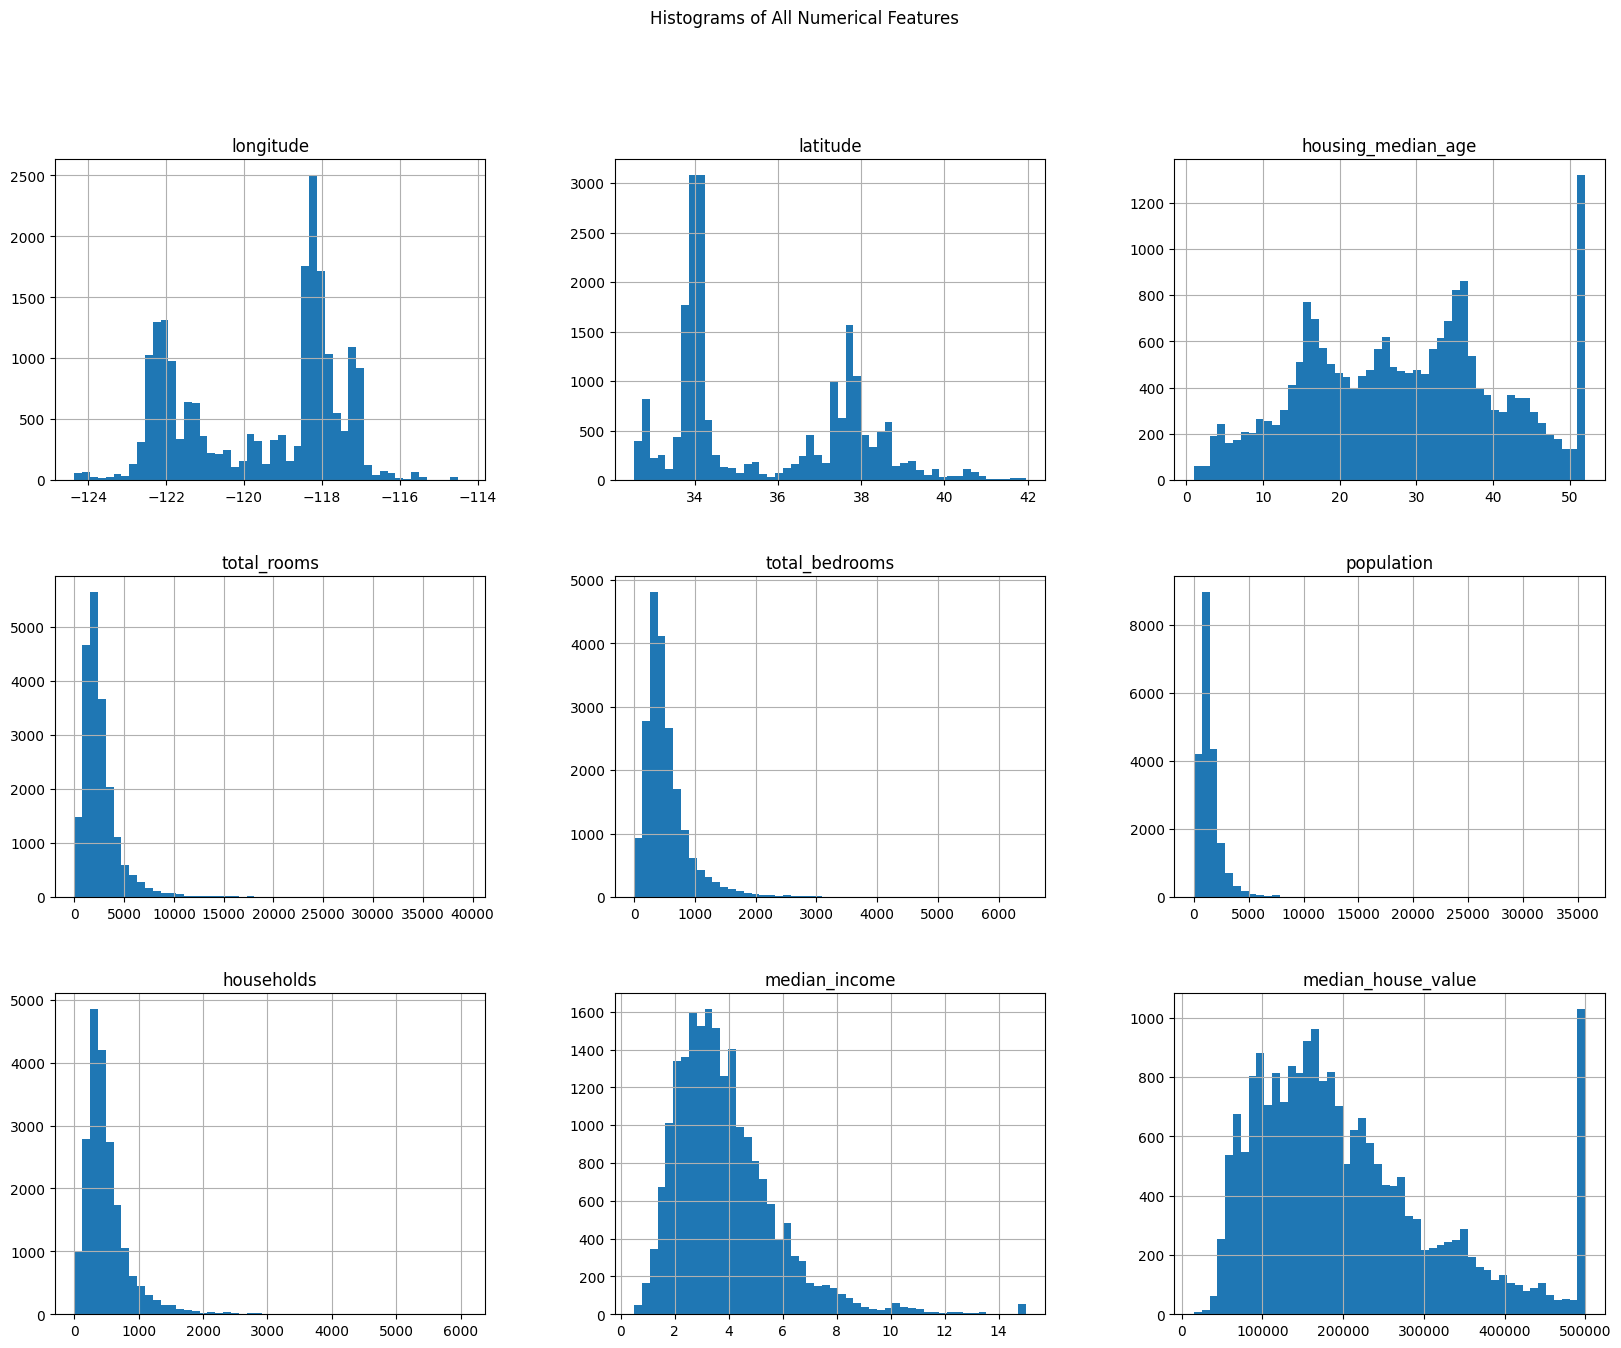

In [15]:
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(20,15))
plt.suptitle('Histograms of All Numerical Features')
plt.show()

Text(0.5, 1.0, 'Box Plot of Population')

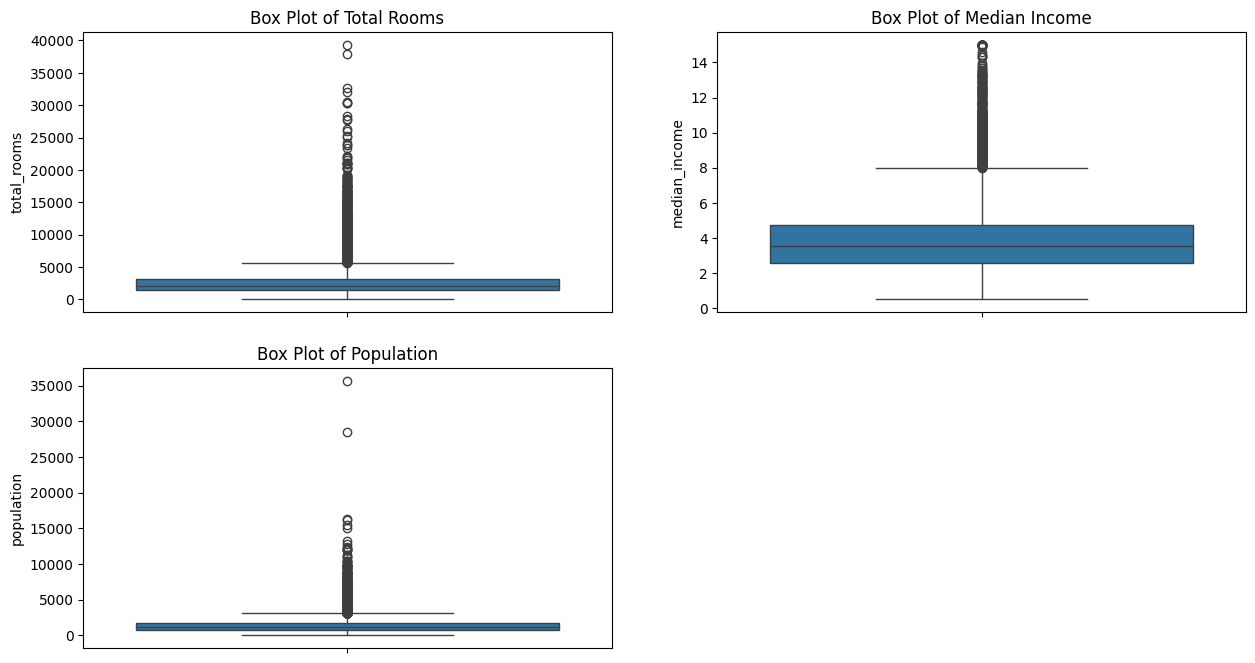

In [16]:
# Import seaborn for advanced visualizations
import seaborn as sns

plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
sns.boxplot(y=df['total_rooms'])
plt.title('Box Plot of Total Rooms')

plt.subplot(2, 2, 2)
sns.boxplot(y=df['median_income'])
plt.title('Box Plot of Median Income')

plt.subplot(2, 2, 3)
sns.boxplot(y=df['population'])
plt.title('Box Plot of Population')

In [17]:
# Find and print outliers for each column
def find_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Iterate through each numerical column and find outliers
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    outliers = find_outliers(df, column)
    print(f"Outliers in {column}:")
    print(outliers[column].values)
    print("-")

Outliers in longitude:
[]
-
Outliers in latitude:
[]
-
Outliers in housing_median_age:
[]
-
Outliers in total_rooms:
[ 7099.  5806.  5871. ... 12139.  6809. 10035.]
-
Outliers in total_bedrooms:
[2477. 1331. 1270. ... 1857. 2640. 1856.]
-
Outliers in population:
[3469. 4367. 4985. ... 6837. 3265. 6912.]
-
Outliers in households:
[1138. 2323. 1180. ... 1832. 2358. 1818.]
-
Outliers in median_income:
[ 8.3252  8.3014 11.6017  8.2049  8.401   8.317   8.1564  8.8793  8.8342
 10.0825  9.3959 11.8603 13.499  12.2138  8.1872 12.3804  8.1194  8.7477
  8.3996  8.4045  9.7194  8.3337 10.9506 10.3203  9.1531  9.5862  8.155
  8.3188  9.7037 10.3345 12.5915 15.0001  9.8708  8.2673  8.4352 10.7372
 13.4883  9.5271 12.2478  8.0839  9.0776  8.039  10.4549 10.3224  8.3678
  8.0448 10.3713 11.7064 11.3421  8.1586  8.9571  8.7589 10.9405 10.3416
  9.0064  8.1489 10.5815 13.2949 13.1499  8.3209  8.3956  8.1163  9.0243
  8.7059 10.5144  8.9669  8.7716  8.3608  8.2737 10.0263 10.5941  8.5325
  9.2873  8.124

In [18]:
# Cap outliers to the 1st and 99th percentiles for each numerical column
# This ensures extreme values are reduced while retaining the overall distribution

def cap_outliers(data, column):
    # Calculate the 1st and 99th percentiles
    lower_percentile = data[column].quantile(0.01)
    upper_percentile = data[column].quantile(0.99)

    # Cap values below the 1st percentile
    data.loc[data[column] < lower_percentile, column] = lower_percentile

    # Cap values above the 99th percentile
    data.loc[data[column] > upper_percentile, column] = upper_percentile

# Iterate through each numerical column and cap outliers
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    cap_outliers(df, column)
    print(f"Capped outliers in {column} to the 1st and 99th percentiles.")

# Display the updated dataset statistics to verify changes
print("\nUpdated dataset statistics:")
print(df.describe())

Capped outliers in longitude to the 1st and 99th percentiles.
Capped outliers in latitude to the 1st and 99th percentiles.
Capped outliers in housing_median_age to the 1st and 99th percentiles.
Capped outliers in total_rooms to the 1st and 99th percentiles.
Capped outliers in total_bedrooms to the 1st and 99th percentiles.
Capped outliers in population to the 1st and 99th percentiles.
Capped outliers in households to the 1st and 99th percentiles.
Capped outliers in median_income to the 1st and 99th percentiles.
Capped outliers in median_house_value to the 1st and 99th percentiles.

Updated dataset statistics:
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569625     35.628008           28.648692   2588.054737   
std        1.976433      2.123872           12.566882   1855.923114   
min     -123.220000     32.680000            4.000000    164.000000   
25%     -121.800000     33.9

In [19]:
# Remove the 'total_bedrooms' column from the dataset
if 'total_bedrooms' in df.columns:
    df.drop(columns=['total_bedrooms'], inplace=True)
    print("Column 'total_bedrooms' has been removed from the dataset.")
else:
    print("Column 'total_bedrooms' does not exist in the dataset.")

Column 'total_bedrooms' has been removed from the dataset.


In [8]:
df

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,741.0,349.0,1.8672,84700.0,INLAND


In [20]:
# Import necessary libraries
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Calculate Variance Inflation Factor (VIF) for 'households' and 'population' columns
# Select the columns for VIF calculation
columns_to_check = ['households', 'population']
X = df[columns_to_check]

# Add a constant column for the VIF calculation
X = sm.add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print("Variance Inflation Factor (VIF) values:")
print(vif_data)

Variance Inflation Factor (VIF) values:
      Feature       VIF
0       const  3.211109
1  households  5.829972
2  population  5.829972


In [21]:
# Based on the VIF values, 'households' and 'population' are highly correlated.
# Since both have the same VIF value, we will keep 'population' as it might be more directly relevant to housing analysis.

# Remove the 'households' column from the dataset
df.drop(columns=['households'], inplace=True)
print("Column 'households' has been removed due to high multicollinearity with 'population'.")

Column 'households' has been removed due to high multicollinearity with 'population'.


In [22]:
df


,longitude,latitude,housing_median_age,total_rooms,population,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,322.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,2401.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,496.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,558.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,565.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,845.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,356.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,1007.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,741.0,1.8672,84700.0,INLAND


In [30]:
# Create a bar chart comparing median_house_value and ocean_proximity
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by ocean_proximity and calculate the mean of median_house_value
grouped_data = df.groupby('ocean_proximity')['median_house_value'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='ocean_proximity', y='median_house_value', palette='viridis')
plt.title('Comparison of Median House Value by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.xticks(rotation=45)
plt.show()

KeyError: 'ocean_proximity'

In [ ]:
# Perform one-hot encoding on the 'ocean_proximity' column
# This will create a new binary column for each category in 'ocean_proximity'
df = pd.get_dummies(df, columns=['ocean_proximity'], prefix='ocean_proximity', drop_first=False)

# Display the first few rows to verify the encoding
print("One-hot encoding applied to 'ocean_proximity':")
print(df.head())

,longitude,latitude,housing_median_age,total_rooms,population,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,322.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,2401.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,496.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,558.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,565.0,3.8462,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,845.0,1.5603,78100.0,False,True,False,False,False
20636,-121.21,39.49,18.0,697.0,356.0,2.5568,77100.0,False,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,1007.0,1.7000,92300.0,False,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,741.0,1.8672,84700.0,False,True,False,False,False


In [25]:
df

,longitude,latitude,housing_median_age,total_rooms,population,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,322.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,2401.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,496.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,558.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,565.0,3.8462,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,845.0,1.5603,78100.0,False,True,False,False,False
20636,-121.21,39.49,18.0,697.0,356.0,2.5568,77100.0,False,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,1007.0,1.7000,92300.0,False,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,741.0,1.8672,84700.0,False,True,False,False,False


In [36]:
df

,longitude,latitude,housing_median_age,total_rooms,population,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,322.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,2401.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,496.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,558.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,565.0,3.8462,342200.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,845.0,1.5603,78100.0,0,0,0,0
20636,-121.21,39.49,18.0,697.0,356.0,2.5568,77100.0,0,0,0,0
20637,-121.22,39.43,17.0,2254.0,1007.0,1.7000,92300.0,0,0,0,0
20638,-121.32,39.43,18.0,1860.0,741.0,1.8672,84700.0,0,0,0,0


In [38]:
from sklearn.preprocessing import StandardScaler
# or MinMaxScaler for 0-1 scaling

# Identify numerical columns (exclude dummy variables)
numerical_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 
                    'population', 'median_income', 'median_house_value']

# Apply scaling
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [39]:
df

,longitude,latitude,housing_median_age,total_rooms,population,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.346081,1.060350,0.982870,-0.920349,-1.112147,2.479625,2.130820,0,0,1,0
1,-1.341022,1.050933,-0.608654,2.430626,1.024755,2.466431,1.314666,0,0,1,0
2,-1.351141,1.046224,1.858207,-0.604056,-0.933301,1.887680,1.259157,0,0,1,0
3,-1.356201,1.046224,1.858207,-0.708050,-0.869574,0.992779,1.165486,0,0,1,0
4,-1.356201,1.046224,1.858207,-0.517844,-0.862379,-0.003348,1.173292,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.769271,1.813709,-0.290349,-0.497368,-0.574581,-1.270557,-1.117317,0,0,0,0
20636,-0.829988,1.818418,-0.847382,-1.018954,-1.077200,-0.718139,-1.125991,0,0,0,0
20637,-0.835047,1.790167,-0.926958,-0.179998,-0.408069,-1.193113,-0.994157,0,0,0,0
20638,-0.885645,1.790167,-0.847382,-0.392297,-0.681477,-1.100425,-1.060074,0,0,0,0


c:\Users\Amol Barkale\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


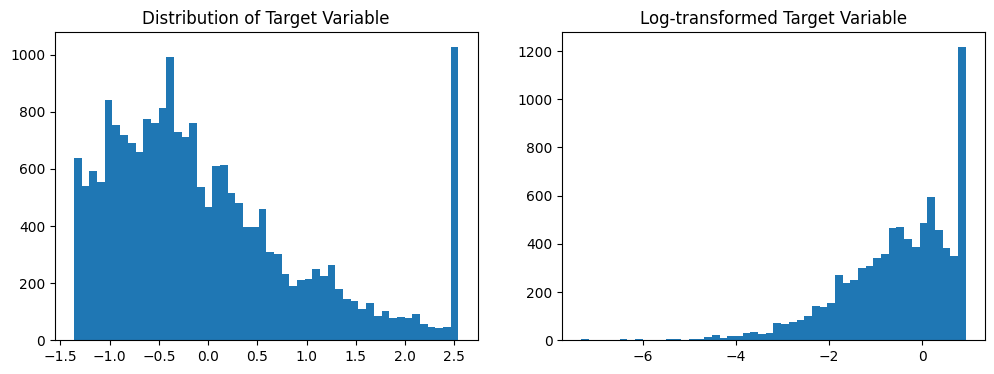

In [42]:
# Check target variable distribution

import matplotlib.pyplot as plt
import numpy as np

# Assuming median_house_value is your target variable
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(df['median_house_value'], bins=50)
plt.title('Distribution of Target Variable')

plt.subplot(1, 2, 2)
plt.hist(np.log(df['median_house_value']), bins=50)
plt.title('Log-transformed Target Variable')
plt.show()

# If right-skewed, consider log transformation
# df['median_house_value'] = np.log(df['median_house_value'])

In [43]:
# Basic data quality assessment
print("Dataset Shape:", df.shape)
print("\nData Types:")
print(df.dtypes)
print("\nBasic Statistics:")
print(df.describe())

# Check for any remaining categorical variables
print("\nUnique values in object columns:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].unique()}")

Dataset Shape: (20640, 11)

Data Types:
longitude                     float64
latitude                      float64
housing_median_age            float64
total_rooms                   float64
population                    float64
median_income                 float64
median_house_value            float64
ocean_proximity_<1H OCEAN       int64
ocean_proximity_ISLAND          int64
ocean_proximity_NEAR BAY        int64
ocean_proximity_NEAR OCEAN      int64
dtype: object

Basic Statistics:
          longitude      latitude  housing_median_age   total_rooms  \
count  2.064000e+04  2.064000e+04        2.064000e+04  2.064000e+04   
mean  -7.601155e-15  2.423557e-16       -8.812933e-17 -1.211778e-16   
std    1.000024e+00  1.000024e+00        1.000024e+00  1.000024e+00   
min   -1.846996e+00 -1.388068e+00       -1.961448e+00 -1.306150e+00   
25%   -1.128513e+00 -7.995064e-01       -8.473820e-01 -6.144287e-01   
50%    5.462622e-01 -6.441260e-01        2.795575e-02 -2.484294e-01   
75%    7.891

In [44]:
# Complete linear regression pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pickle

# 1. Prepare data
y = df['median_house_value']
X = df.drop('median_house_value', axis=1)

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Model Performance - R²: {r2:.4f}, RMSE: {rmse:.4f}")

# 5. Save model
with open('house_price_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model ready for testing!")

Model Performance - R²: 0.6207, RMSE: 0.6108
Model ready for testing!


In [45]:
# If you saved the original data before preprocessing
df_original = pd.read_csv('housing.csv')  # or however you loaded it initially
households_column = df_original['households']

# Add it back to your current processed dataframe
df['households'] = households_column

print("Households column added back!")
print(df['households'].head())

Households column added back!
0     126.0
1    1138.0
2     177.0
3     219.0
4     259.0
Name: households, dtype: float64


In [50]:
# Once you have households column back, create derived features
def add_derived_features(df):
    df_new = df.copy()
    
    # Check if required columns exist
    required_cols = ['households', 'total_rooms', 'population']
    if all(col in df.columns for col in required_cols):
        # Create derived features
        df_new['rooms_per_household'] = df_new['total_rooms'] / (df_new['households'] + 1e-8)
        df_new['population_per_household'] = df_new['population'] / (df_new['households'] + 1e-8)
        
        print("Derived features created successfully!")
        
        # Scale the new features
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        new_features = ['rooms_per_household', 'population_per_household']
        df_new[new_features] = scaler.fit_transform(df_new[new_features])
        
    else:
        print("Missing required columns:", [col for col in required_cols if col not in df.columns])
    
    return df_new

# Apply derived features
df_with_features = add_derived_features(df)

Derived features created successfully!


In [51]:
df

,longitude,latitude,housing_median_age,total_rooms,population,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,households,rooms_per_household,income_per_room
0,-1.346081,1.060350,0.982870,-0.920349,-1.112147,2.479625,2.130820,0,0,1,0,126.0,-0.007304,-2.694224
1,-1.341022,1.050933,-0.608654,2.430626,1.024755,2.466431,1.314666,0,0,1,0,1138.0,0.002136,1.014731
2,-1.351141,1.046224,1.858207,-0.604056,-0.933301,1.887680,1.259157,0,0,1,0,177.0,-0.003413,-3.125008
3,-1.356201,1.046224,1.858207,-0.708050,-0.869574,0.992779,1.165486,0,0,1,0,219.0,-0.003233,-1.402131
4,-1.356201,1.046224,1.858207,-0.517844,-0.862379,-0.003348,1.173292,0,0,1,0,259.0,-0.001999,0.006466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.769271,1.813709,-0.290349,-0.497368,-0.574581,-1.270557,-1.117317,0,0,0,0,330.0,-0.001507,2.554561
20636,-0.829988,1.818418,-0.847382,-1.018954,-1.077200,-0.718139,-1.125991,0,0,0,0,114.0,-0.008938,0.704780
20637,-0.835047,1.790167,-0.926958,-0.179998,-0.408069,-1.193113,-0.994157,0,0,0,0,433.0,-0.000416,6.628474
20638,-0.885645,1.790167,-0.847382,-0.392297,-0.681477,-1.100425,-1.060074,0,0,0,0,349.0,-0.001124,2.805083


In [52]:
# Complete linear regression pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pickle

# 1. Prepare data
y = df['median_house_value']
X = df.drop('median_house_value', axis=1)

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Model Performance - R²: {r2:.4f}, RMSE: {rmse:.4f}")

# 5. Save model
with open('house_price_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model ready for testing!")

Model Performance - R²: 0.6344, RMSE: 0.5997
Model ready for testing!


In [53]:
from sklearn.preprocessing import PolynomialFeatures

# Add polynomial features (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_poly = poly.fit_transform(X)

# Train with polynomial features
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

y_pred_poly = model_poly.predict(X_test_poly)
r2_poly = r2_score(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

print(f"Polynomial Features - R²: {r2_poly:.4f}, RMSE: {rmse_poly:.4f}")
print(f"Improvement: +{(r2_poly - 0.6344):.4f}")

Polynomial Features - R²: 0.6987, RMSE: 0.5444
Improvement: +0.0643


In [56]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"Random Forest - R²: {r2_rf:.4f}, RMSE: {rmse_rf:.4f}")
print(f"Improvement: +{(r2_rf - 0.6344):.4f}")

# Show feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 5 Most Important Features:")
print(feature_importance.head())

with open('house_price_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

print("Model ready for testing!")

Random Forest - R²: 0.7727, RMSE: 0.4728
Improvement: +0.1383

Top 5 Most Important Features:
                     feature  importance
5              median_income    0.581286
0                  longitude    0.102449
1                   latitude    0.087896
2         housing_median_age    0.057775
6  ocean_proximity_<1H OCEAN    0.040638
Model ready for testing!
